# Exploratory Data Analysis (EDA)

---

Exploratory data analysis (EDA) is an important step in the machine learning process that involves understanding the characteristics and patterns in the data.

My EDA steps:

1.   Data Loading and Inspection
2.   Data Cleaning
3.   Data Transformation
4.   Data Visualization
5.   Univariate Analysis
6.   Bivariate Analysis
7.   Multivariate Analysis
8.   Feature Selection





## Required Libraries

In [1]:
# pip install ydata-profiling 
# from ydata_profiling import ProfileReport

import requests, io 
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt

## Data Loading and Inspection

1.   Data is retrieved from "UC Irvine Machine Learning Repository" via request.
2.   The source file is in a compressed zip format therefore it is requred to unzip the file, for this step I used zipfile library.
3. The unzipped file contains data.csv file where elements are delimited by ";".

In [2]:
URL = 'https://archive-beta.ics.uci.edu/static/public/697/predict+students+dropout+and+academic+success.zip'

req = requests.get(URL)

zipped = ZipFile(io.BytesIO(req.content))

dataset = pd.read_csv(zipped.open('data.csv'), delimiter=';')


Inspecting the first few rows to get general understanding of the data structure, attributes, and data types.


In [4]:
dataset.head().transpose()

,0,1,2,3,4
Marital status,1,1,1,1,2
Application mode,17,15,1,17,39
Application order,5,1,5,2,1
Course,171,9254,9070,9773,8014
Daytime/evening attendance\t,1,1,1,1,0
Previous qualification,1,1,1,1,1
Previous qualification (grade),122.0,160.0,122.0,122.0,100.0
Nacionality,1,1,1,1,1
Mother's qualification,19,1,37,38,37
Father's qualification,12,3,37,37,38


In [6]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [5]:
dataset.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

## Data Cleaning

In this step I am checking for missing values, duplicate rows, and outliers.

### Missing values

In [7]:
dataset.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

### Duplicated rows

In [9]:
dataset.duplicated().sum()

0

### Outliers

In [30]:
float_attributes = [column for column in dataset.columns if dataset[column].dtype == 'float64']

In [35]:
def normalize(x):
  return ((x - min(x)) / (max(x) - min(x))) 

In [ ]:
df_test = dataset.iloc[:,].copy()
df_test[float_attributes] = df_test[float_attributes].apply(normalize)

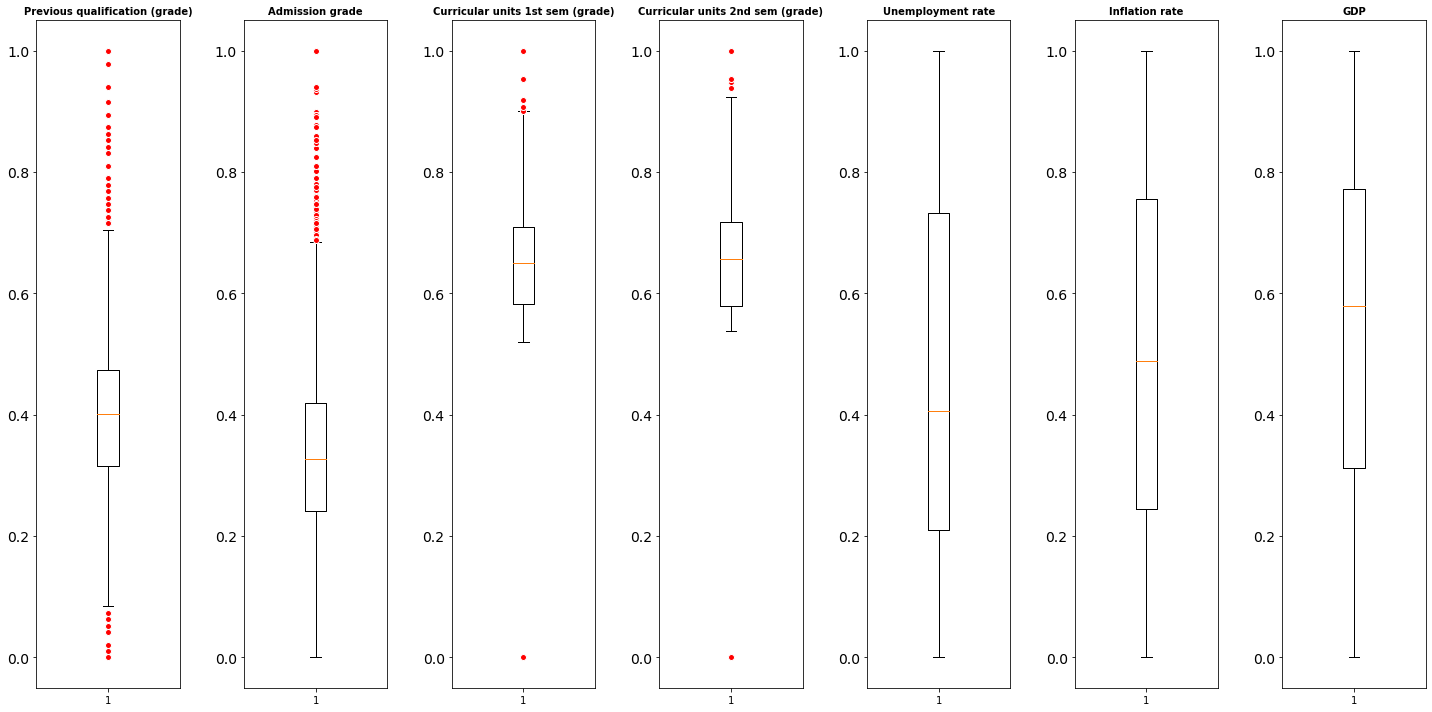

In [48]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, len(float_attributes), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_test[float_attributes].iloc[:,i], flierprops=red_circle)
    ax.set_title(df_test[float_attributes].columns[i], fontsize=10, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

## Data Transformation

## Data Visualization

## Univariate Analysis

## Bivariate Analysis

## Multivariate Analysis

## Feature Selection